In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic, binned_statistic_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.pf_stats import *
from src.regions import *
from src.plotting import *

In [3]:
#
# Load region data
#
regions = [cio_region(), wmp_region()]
df = pd.concat(
    [load_pf_stats(r) for r in regions], 
)

In [ ]:
df['mean_longitude'].max()

60.0

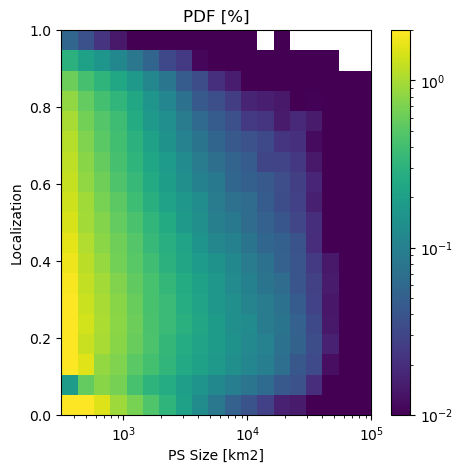

In [31]:
#
# Plot histogram of statistics
#
fig, ax = plt.subplots(ncols=1, figsize=(5,5))

area = df.num_pixels * 25
area_bins = np.logspace(2.5, 5, 20)
loc = df['max_5mmhr_cluster_precip']/df['total_precip']
loc_bins = np.linspace(0, 1, 20)

counts = (
    binned_statistic_2d(
        loc, 
        area, 
        None, 
        bins=[loc_bins, area_bins], 
        statistic='count'
    )
    .statistic
)

X, Y = np.meshgrid(area_bins, loc_bins)

c = (
        ax.pcolormesh(
        X, 
        Y, 
        100*counts/counts.sum(),
        cmap=plt.cm.viridis, 
        norm=colors.LogNorm(vmin=1e-2, vmax=2)
    )
)

ax.set_xscale('log')
ax.set_xlabel('PS Size [km2]')
ax.set_ylabel('Localization')
ax.set_title('PDF [%]')
fig.colorbar(c)



Text(0.5, 1.0, 'PDF [%]')

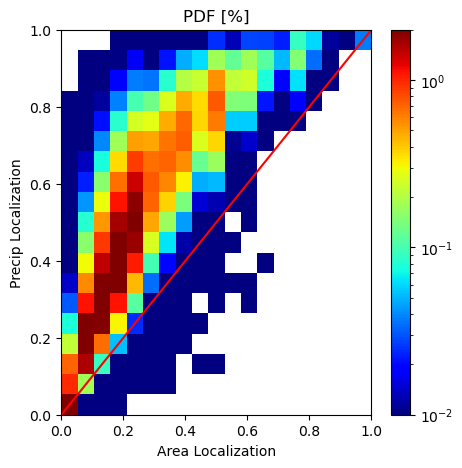

In [33]:
#
# Plot histogram of statistics
#
fig, ax = plt.subplots(ncols=1, figsize=(5,5))

arealoc = df['max_5mmhr_size']/df['num_pixels']
prloc = df['max_5mmhr_cluster_precip']/df['total_precip']
loc_bins = np.linspace(0, 1, 20)

counts = (
    binned_statistic_2d(
        prloc, 
        arealoc, 
        None, 
        bins=[loc_bins, loc_bins], 
        statistic='count'
    )
    .statistic
)

X, Y = np.meshgrid(loc_bins, loc_bins)

c = (
        ax.pcolormesh(
        X, 
        Y, 
        100*counts/counts.sum(),
        cmap=plt.cm.jet, 
        norm=colors.LogNorm(vmin=1e-2, vmax=2)
    )
)

ax.set_xlabel('Area Localization')
ax.set_ylabel('Precip Localization')
ax.plot([0,1],[0,1], color='r', linestyle='-')
fig.colorbar(c)
ax.set_title('PDF [%]')



In [1]:
df

NameError: name 'df' is not defined

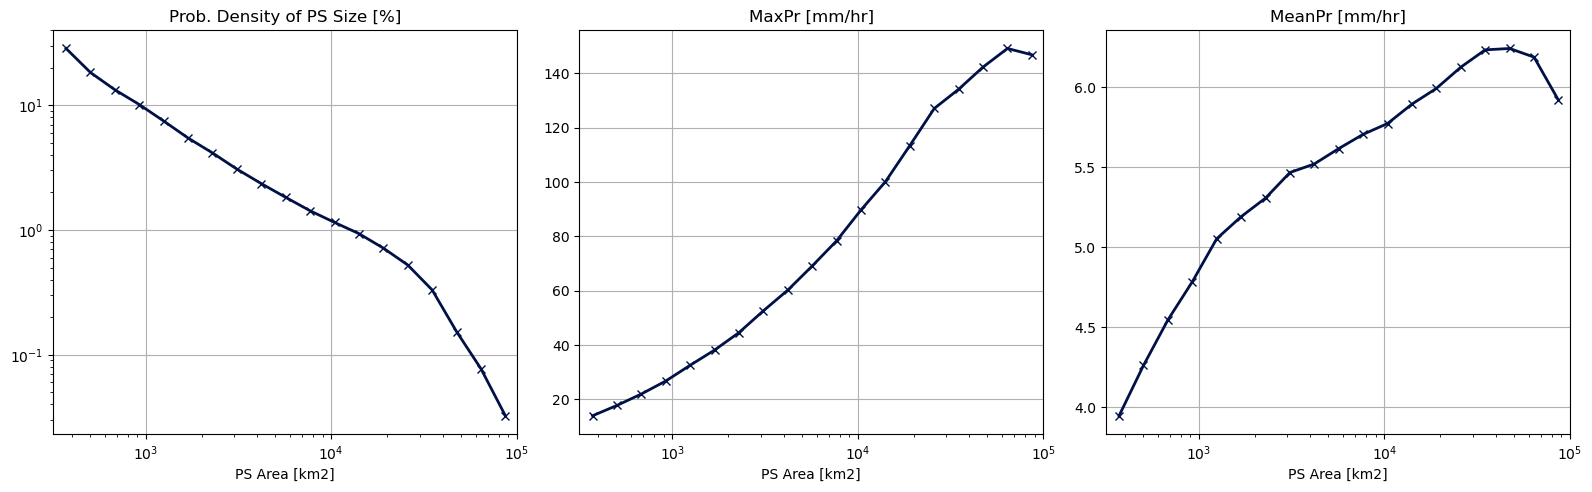

In [4]:
#
# PF sizes and MaxPr histogram and dependence
#

fig, axs = plt.subplots(ncols=3, figsize=(16,5))

area = df.num_pixels * 25
area_bins = np.logspace(2.5, 5, 20)

counts = binned_statistic(
    area,
    None,
    bins=area_bins, 
    statistic='count'
).statistic

maxpr = binned_statistic(
    area,
    df.max_precip,
    bins=area_bins, 
    statistic=lambda x: np.nanmean(x) if x.size>50 else np.nan
).statistic

meanpr = binned_statistic(
    area,
    df.total_precip/df.num_pixels,
    bins=area_bins, 
    statistic=lambda x: np.nanmean(x) if x.size>50 else np.nan
).statistic

axs[0].plot(
    array_midpoints(area_bins),
    100*counts/counts.sum(),
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[0].set_title('Prob. Density of PS Size [%]')
axs[0].set_yscale('log')

axs[1].plot(
    array_midpoints(area_bins),
    maxpr,
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[1].set_title('MaxPr [mm/hr]')

axs[2].plot(
    array_midpoints(area_bins),
    meanpr,
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[2].set_title('MeanPr [mm/hr]')

for ax in axs.ravel():
    ax.set_xlabel('PS Area [km2]')
    ax.set_xscale('log')
    ax.set_xlim(area_bins.min(), area_bins.max())
    ax.grid()

fig.tight_layout(pad=1.0)

save_figure(fig, 'ps_size_meanpr_maxpr_pdf')

In [ ]:
#
# PF sizes and MaxPr histogram and dependence
#

fig, axs = plt.subplots(ncols=3, figsize=(16,5))

area = df.num_pixels * 25
area_bins = np.logspace(2.5, 5, 20)

counts = binned_statistic(
    area,
    None,
    bins=area_bins, 
    statistic='count'
).statistic

maxpr = binned_statistic(
    area,
    df.max_precip,
    bins=area_bins, 
    statistic=lambda x: np.nanmean(x) if x.size>50 else np.nan
).statistic

meanpr = binned_statistic(
    area,
    df.total_precip/df.num_pixels,
    bins=area_bins, 
    statistic=lambda x: np.nanmean(x) if x.size>50 else np.nan
).statistic

axs[0].plot(
    array_midpoints(area_bins),
    100*counts/counts.sum(),
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[0].set_title('Prob. Density of PS Size [%]')
axs[0].set_yscale('log')

axs[1].plot(
    array_midpoints(area_bins),
    maxpr,
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[1].set_title('MaxPr [mm/hr]')

axs[2].plot(
    array_midpoints(area_bins),
    meanpr,
    marker='x',
    lw=2,
    color='xkcd:navy blue'
)
axs[2].set_title('MeanPr [mm/hr]')

for ax in axs.ravel():
    ax.set_xlabel('PS Area [km2]')
    ax.set_xscale('log')
    ax.set_xlim(area_bins.min(), area_bins.max())
    ax.grid()

fig.tight_layout(pad=1.0)